<a href="https://colab.research.google.com/github/rainmaker29/fashion-MNIST/blob/master/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets


Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
#Loading dataset

dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print("{0} no. of training images, {1} number of test images".format(num_train,num_test))

60000 no. of training images, 10000 number of test images


In [0]:
def normalize(image,labels):
  image = tf.cast(image,tf.float32)
  image = image/255
  return image,labels

#dataset.map is like pf.apply()
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#TF datasets also come with CACHES ! (for faster loading)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

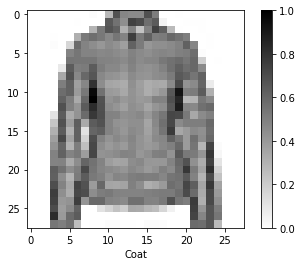

In [7]:

# This single iteration loop loads the first image and label from tets_dataset

for image,label in test_dataset.take(1):
  break

#Now we remove the third dimension from image which is just the color,insignificant for classification
image = image.numpy().reshape((28,28))

#Plotting the image
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[label])
plt.show()


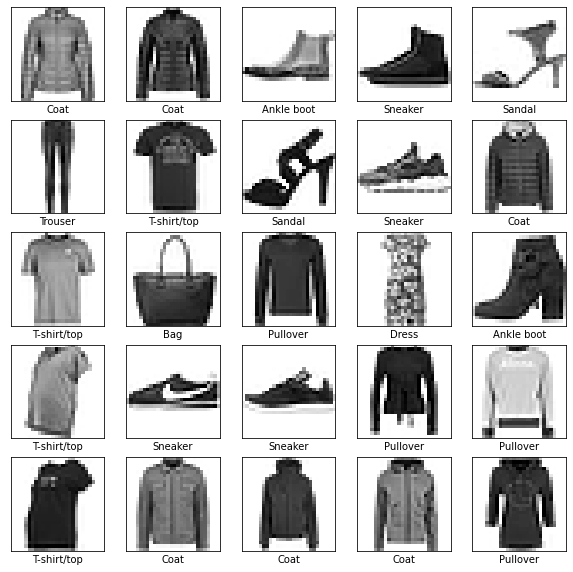

In [8]:
plt.figure(figsize=(10,10))

for i,(image,label) in zip(range(25),test_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])

plt.show()

In [0]:
# Building NN

# model = tf.keras.Sequential([
    
#     tf.keras.layers.Flatten(input_shape=(28,28,1)),
#     tf.keras.layers.Dense(128,activation=tf.nn.relu),
#     tf.keras.layers.Dense(256,activation=tf.nn.relu),
#     tf.keras.layers.Dense(128,activation=tf.nn.relu),
#     tf.keras.layers.Dense(10,activation=tf.nn.softmax)


# ])
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [0]:
BATCH_SIZE=32
train_dataset = train_dataset.cache().repeat().shuffle(num_train).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [12]:
train_dataset.take(0)

<DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [13]:
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7827 - accuracy: 0.6797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6951 - accuracy: 0.7659
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6911 - accuracy: 0.7693
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6831 - accuracy: 0.7778
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6967 - accuracy: 0.7642
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6860 - accuracy: 0.7749
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6804 - accuracy: 0.7804
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6795 - accuracy: 0.7817
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6746 - accuracy: 0.7863
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.653

In [14]:
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test/32))
print("accuracy on test data ",test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 1.6422 - accuracy: 0.8190
accuracy on test data  0.8190000057220459


In [0]:
#Predictions

In [0]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


In [17]:
predictions.shape

(32, 10)

In [18]:
predictions[0]

array([3.0062087e-33, 5.2251927e-12, 1.0535208e-18, 6.7901026e-23,
       1.0000000e+00, 8.0864380e-35, 1.3274503e-23, 5.4013163e-28,
       1.4692654e-36, 5.1328577e-14], dtype=float32)

In [19]:
np.argmax(predictions[0])

4

In [20]:
test_labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

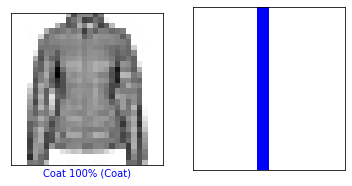

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

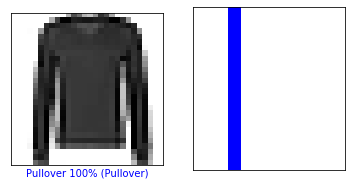

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

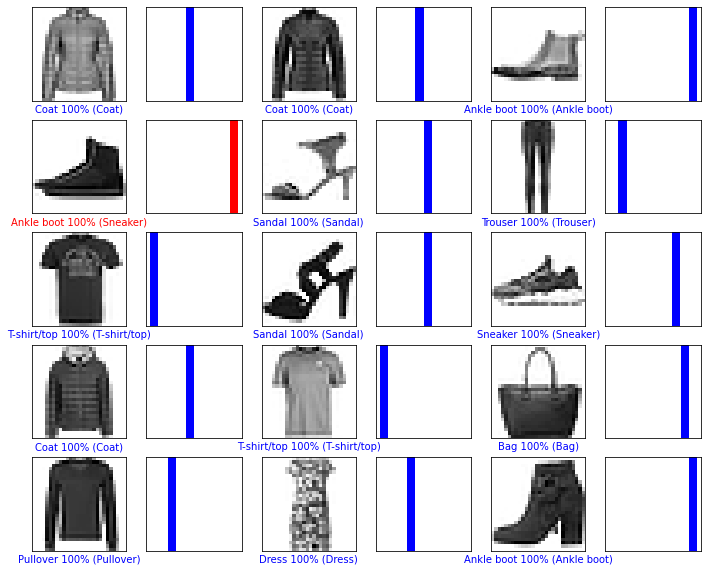

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [25]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [26]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0062087e-33 5.2251623e-12 1.0535168e-18 6.7900767e-23 1.0000000e+00
  8.0864380e-35 1.3274453e-23 5.4012956e-28 1.4692654e-36 5.1328577e-14]]


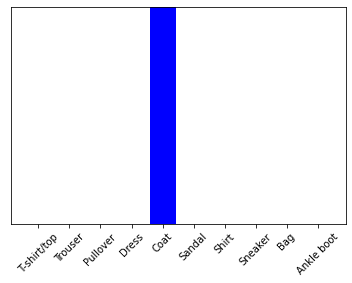

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

4